# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Experimental calibration

**Author**: Jesús del Hoyo

**Date**:   11/04/2019

**Motivation**: Ecograb project, polariscope callibration

**Objective**:

Este archivo debe servir para realizar una calibración completa del polarimetro. En primer lugar, se calibrarán los elementos en transmisión, introduciéndolos uno a uno. Una vez que el polarímetro esté completamente caracterizado en transmisión, opcionalmente podrán medirse el resto de elementos que se deben colocar en el camino del haz para trabajar en reflexión, como un espejo, un beam splitter o el objetivo de microscopio.

A continuación se describen los elementos de cada parte del polarímetro. Estos elementos pueden cambiar con el tiempo, pero el proceso de calibración es casi el mismo. La única excepción es en caso de que se incluya una fuente con longitud de onda variable. En ese caso, será necesaria una calibración para cada longitud de onda.

**Iluminación**:
1. Diodo láser de Roithner S85500MG de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Polarizador LPNIRE100-B (P0)
1. Retardador WPQ10E-850-SP (R0)

**Brazo de referencia**
1. Beam sampler.
1. Lente ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD0)

**Generador de estados**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).

**Analizador de estados**
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

**Detector**
1. Dos lentes ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD1)

**Método de calibración**
La calibración se realiza siempre empezando con el número mínimo de elementos, y añadiéndolos poco a poco para reducir los errores cometidos. Se recomienda dejar calentar la fuente al menos 30 minutos para estabilizarla en temperatura.

1. Medir el nivel de 0 de ambos fotodiodos con el diodo apagado y sin ningún elemento óptico salvo las lentes y el beam splitter.
1. Encender el diodo y colocar P0. Ajustar su ángulo para que se transmita la mayor cantidad de señal posible (se recomienda usar un osciloscopio).
1. Colocar R0 y P2. Se ajusta su ángulo de tal manera que, al hacer un bucle de 360º con P2 se obtenga la menor diferencia entre máximo y mínimo.
1. Retirar P1. En estas condiciones medimos las señales de ambos fotodiodos para tener una medida clara de cuanta energía tenemos sin ningún elemento optico ni del analizador ni del generador de estados, y por supuesto, sin la muestra.
1. Colocar P1 (en la posición de P2) y el polarizador de eje conocido, y rotar P1. De esta manera podremos conocer su ángulo de origen.
1. Retirar el polarizador de eje conocido y colocar R1. Al hacer un bucle en R1 se puede conocer su ángulo de origen.
1. Realizar un doble bucle tanto en R1 como en P2. De esta manera se analiza la fuente de iluminación.
1. Retirar R1 y colocar P3 en la posición de P1.Hacer un bucle en P3.
1. Retirar P1 (que estaba en la posición de P2) y colocar ahí P2. Hacer un bucle en P2.
1. Retirar P3 (que estaba en la posición de P1) y colocar ahí P1. Hacer un bucle en P1.
1. Colocar R1 y hacer un doble bucle con P1 y P2.
1. Colocar R2 y hacer un doble bucle con R1 y R2 manteniendo los polarizadores paralelos.
1. Repetir con los polarizadores cruzados.
1. Análisis de datos. Partimos de una serie de parámetros parecidos a los reales, con ángulos de giro aleatorios, y una fuente de iluminación con elipticidad ligeramente aleatoria. Entonces, se van ajustando todos los experimentos, uno a uno. La bondad del ajuste final se determina por la medida de la matriz de Mueller del vacío, usando los datos del último experimento.
1. Este último paso se repite iterativamente, usando los parámetros finales de una iteración como los parámetros iniciales de la siguiente.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [6]:
import numpy as np
from polaripython.polarimeter import measure_int, degrees
import polaripython.calibration as cal

# Stage 1: Experiments

The calibration is divided in two stages. During the first one, we perform all the experiments before starting the data fitting.

## Parameters

Here we set all the parameters we are going to use for the analysis, including paths and filenames. We store all of them in a dictionary.

In [7]:
cal_dict = {}
# Files
cal_dict["cal_path"] = 'C:\Users\luismiguel\software\polaripython\calibration'
cal_dict["cal_final_path"] = None
cal_dict["cal_name"] = None
# Experiment parameters
cal_dict["type"] = 'Experiment'
cal_dict["N_measures_1D"] = 91
cal_dict["N_measures_2D"] = [15, 15]
cal_dict["N_measures_2D_step_4b"] = [31, 31]
cal_dict["N_measures_pol"] = 200
cal_dict["max_angle_1D"] = 180*degrees
cal_dict["max_angle_2D"] = 180*degrees
cal_dict["step_5a"] = "all"
cal_dict["step_5b"] = "all"
# Fit parameters
cal_dict["NmaxIt"] = 20
cal_dict["tolerance"] = 1e-4
cal_dict["tolerance_fit"] = 1e-4
cal_dict["PlotCadaPaso"] = False
cal_dict["ordenarPes"] = True
cal_dict["ErrorAmpIni"] = 90 * degrees
cal_dict["ErrorAmpFin"] = 0.5 * degrees
# cal_dict["ErrorEllipAmpIni"] = 2 * degrees
# cal_dict["ErrorEllipAmpFin"] = 0.1 * degrees
cal_dict["tol_while"] = 2.5e-4
cal_dict["N_it_while"] = 10
cal_dict["use_random_angles"] = True
cal_dict["fix_parameters"] = True
cal_dict["save_data"] = True
cal_dict["interpolate_first_it"] = True
cal_dict["err_amp"] = 0*degrees
cal_dict['Subiterations_only_1st'] = True
# Derived parameters
cal_dict["angles_1"] = np.linspace(0,cal_dict["max_angle_1D"],cal_dict["N_measures_1D"])
cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][0])
cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][1])
cal_dict["angles_2X_step_4b"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D_step_4b"][0])
cal_dict["angles_2Y_step_4b"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D_step_4b"][1])

## Step 0: Preparations

These steps are necessary to perform the calibration, but no 1D, 2D or polarimetry measurement is performed.

### Step 0a: Initialization

We start by initializing card and motors.

In [8]:
cal_dict = cal.initialize_calibration(cal_dict)

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7
C:\Users\luismiguel\software\polaripython\calibration\Calibration_2019-07-15
Calibration initialized succesfully


### Step 0b: Align detectors

The analyzer arm is usually moved. First, we have to place it so we have the polarimeter in transmission configuration. Then, we must turn on the diode and, after waiting a bit so the intensity is stable over time, the detectors must be placed so the signal is maximum for both of them.

### Step 0c: Photodetector background
 
We have to measure and record the signal measured by the photodetectors with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [9]:
# Apagar diodo
cal_dict['I0'] = measure_int(cal_dict['equipment'], verbose=True)

-0.0141, 0.0166, 

### Step 0d: Align polarizer 0 (P0)

P0 must be placed at the output of the laser diode. The diode shoud emmit linear light, but we use P0 as caution. The alignment is performed manually, so the researcher should do it looking at the osciloscope.

### Step 0e: Align retarder 0 (R0)

After placing P0, retarder 0 must be aligned. In order to do that, a polarizer (p1 for example) must be placed in a motor (for example, Motor 3). The idea is that R0 will be aligned when, making a loop with P1, the diference between maximum and minimum must be as close to zero as possible. In order to help with the alignment, the function *step_2* makes a loop and fits the result to calculate Imin and Imax as accurately as possible.


Completion:   0   3   5   7   8  10  12  13  15  17  18  20  22  23  25  27  28  30  32  33  35  37  38  40  42  43  45  47  48  50  52  53  55  57  58  60  62  63  65  67  68  70  72  73  75  77  78  80  82  83  85  87  88  90  92  93  95  97  98 100 102 %

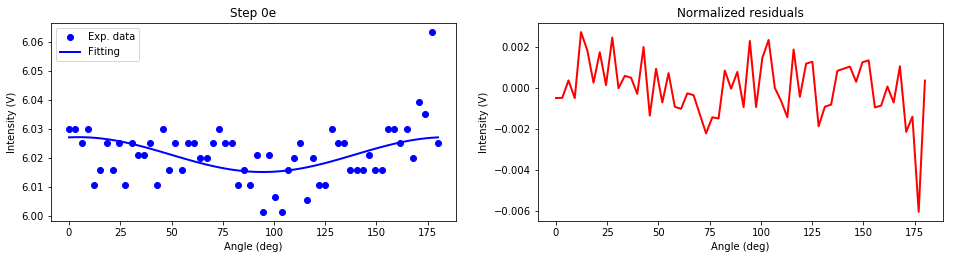

The normalized MSE is: 0.02 %.

The values obtained are:
   - Imax       : 6.0271 V
   - Imin       : 6.0150 V
   - Difference : 0.0120 V


In [7]:
# Parameters
num_data = 60              # Number of points. More points means higher accuracy, but also longer time to make the measurement
max_angle = 180*degrees    # Maximum angle we turn the polarizer
motor_num = 3              # Motor with the polarizer

cal.make_step_0e(cal_dict, num_data, max_angle, motor_num)

### Step 0f: Photodiodes linearity

We should check that the photodiode response is linear. Ideally, we would do it changing the diode current so we linearly vary the illumination intensity. Then, measuring the photodiode response, we would be able to measure this parameter plotting the curve. However, right now the diode emission is only stable after few minutes of waiting, and there is no proof that its emission after stabilization is linear respect to current intensity.

In older calibrations, it was checked that the photodetectors are linear at least up to 5 V. We should check that we are not measuring obove that value.

In [8]:
# Just for the posterity, record set current and voltage (in mA and V respectively)
cal_dict["current"] = 240
cal_dict["voltage"] = np.nan
I = measure_int(cal_dict["equipment"])
print('The measured intensities are:')
print('  - Measurement channel   : {:.4f} V.'.format(I[0]))
print('  - Reference channel     : {:.4f} V.'.format(I[1]))

TypeError: measure_int() takes at least 1 argument (0 given)

### Step 0g: Photodetector stability

We will measure the average intensity of signal and reference channels over time. With it, we can calculate averages and later we will be able to correct the small deviations and reduce errors.


Completion:   0   0   1   1   1   2   2   2   3   3   3   4   4   4   5   5   5   6   6   6   7   7   7   8   8   8   9   9   9  10  10  10  11  11  11  12  12  12  13  13  13  14  14  14  15  15  15  16  16  16  17  17  17  18  18  18  19  19  19  20  20  20  21  21  21  22  22  22  23  23  23  24  24  24  25  25  25  26  26  26  27  27  27  28  28  28  28  29  29  30  30  30  31  31  31  32  32  32  33  33  33  34  34  34  35  35  35  36  36  36  37  37  37  38  38  38  39  39  39  40  40  40  41  41  41  42  42  42  43  43  43  44  44  44  45  45  45  46  46  46  47  47  47  48  48  48  49  49  49  50  50  50  51  51  51  52  52  52  53  53  53  54  54  54  55  55  55  56  56  56  56  57  57  57  58  58  59  59  59  60  60  60  61  61  61  62  62  62  63  63  63  64  64  64  65  65  65  66  66  66  67  67  67  68  68  68  69  69  69  70  70  70  71  71  71  72  72  72  73  73  73  74  74  74  75  75  75  76  76  76  77  77  77  78  78  78  79  79  79  80  80  80  81  81  81  82  82

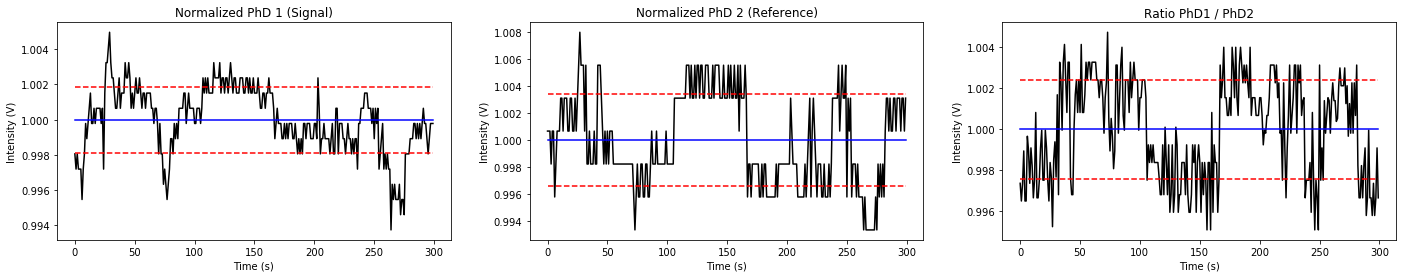

In [11]:
Nmeasurements = 300    # Number of measurements
Twait = 1              # Waiting time between measurements in seconds
cal_dict['S0'], cal_dict['mean_ref'], cal_dict['error_rel_I'] = cal.make_step_0g(cal_dict, Nmeasurements, Twait)

## Step 1: Reference angle of P1

In this step we perform the Malus Law experiment with P1 (placed in motor 3) and a polarizer with known optical axes. It is supposed that those angles are aligned with the X and Y axes of the lab, but previous calibrations shows a discrepancy pof ~27º. 


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


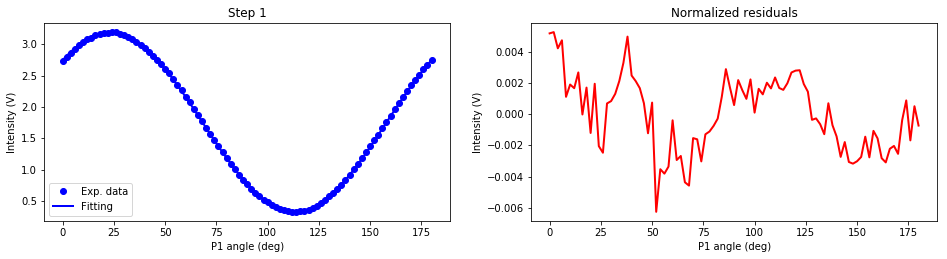

The normalized MSE is: 0.03 %.

Preliminarr analysis first iteration:
   - Pmalo p1      : 1.342
   - Pmalo p2      : 0.431
   - P1 theta_0    : 156.9 deg
   - Diode I0      : 3.191 V


In [13]:
# cal_dict["N_measures_1D"] = 91
# cal_dict["angles_1"] = np.linspace(0,cal_dict["max_angle_1D"],cal_dict["N_measures_1D"])

cal_dict["I_step_1"], cal_dict["Mpmalo"], cal_dict["th0_p1b_test"], cal_dict['Ifuente_test'] = cal.make_step_1(cal_dict)

## Step 2: Characterization of the illumination

During this step, the illumination will be characterized. This step is divided in two. 

### Step 2a: Reference angle of R2

Now we will place R2 in Motor 2 and will remove the polarizer of known axes. With P1 (which was placed in Motor 3) rotating and R2 still, we will have a pseudo-Malus Law result (because illumination is close to circular). This will allow us measure the origin angle of R2. 

This is done in a separate step to increase the resolution in angles.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


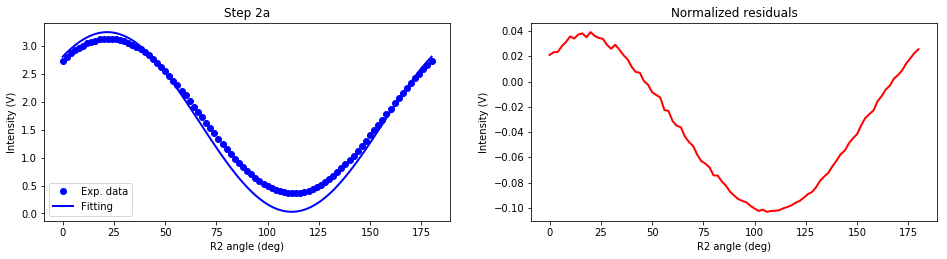

The normalized MSE is: 0.62 %.

[ 0.97390257 -0.14436336]
Preliminary analysis:
   - R1 theta_0    : -8.3 deg


In [21]:
# reload(cal)
cal_dict["I_step_2a"], cal_dict["th0_r2b_test"] = cal.make_step_2a(cal_dict)

### Step 2b: Analyze the light source

Now that we know the reference angles of P1 and R2, we have a Stokes state analyzer, and we can use it to analyze the light source.


Completion:   0   0   0   1   1   2   2   3   3   4   4   4   5   5   6   6   7   7   8   8   8   9   9  10  10  11  11  12  12  12  13  13  14  14  15  15  16  16  16  17  17  18  18  19  19  20  20  20  21  21  22  22  23  23  24  24  24  25  25  26  26  27  27  28  28  28  29  29  30  30  31  31  32  32  32  33  33  34  34  35  35  36  36  36  37  37  38  38  39  39  40  40  40  41  41  42  42  43  43  44  44  44  45  45  46  46  47  47  48  48  48  49  49  50  50  51  51  52  52  52  53  53  54  54  55  55  56  56  56  57  57  58  58  59  59  60  60  60  61  61  62  62  63  63  64  64  64  65  65  66  66  67  67  68  68  68  69  69  70  70  71  71  72  72  72  73  73  74  74  75  75  76  76  76  77  77  78  78  79  79  80  80  80  81  81  82  82  83  83  84  84  84  85  85  86  86  87  87  88  88  88  89  89  90  90  91  91  92  92  92  93  93  94  94  95  95  96  96  96  97  97  98  98  99  99 100 %
The normalized MSE is: 2.31 %
Preliminary analysis:
Illumination = [+6.206; +0.84

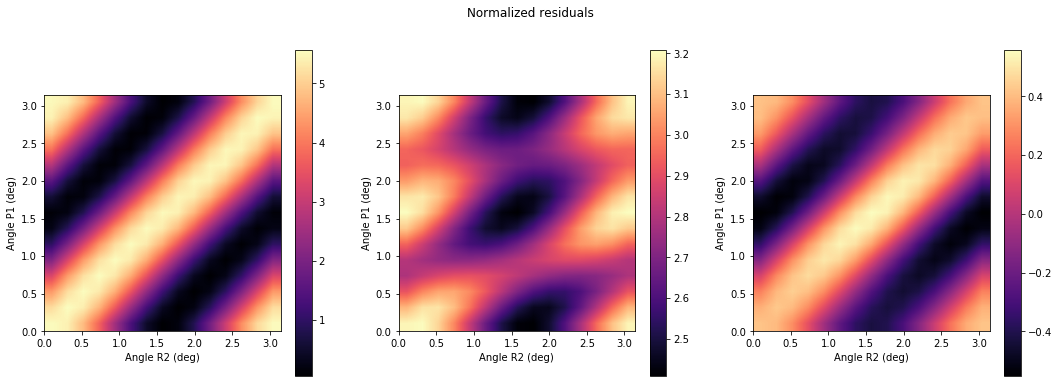

In [24]:
# reload(cal)
# cal_dict["N_measures_2D"] = [15, 15]
# cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][0])
# cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][1])

cal_dict["I_step_2b"], cal_dict['Ifuente_test'] = cal.make_step_2b(cal_dict)

##  Step 3: Calibrate the polarizers

At this step we calibrate the polarizers of the polarimeter. If we assume that both of them can be different (and the probably are, even slightly, due to fabrication tolerances) we need to use three different ones. We will perform the Malus Law experiment with three sets of two polarizers, using each one twice. In this way, we will be able to measure p1 and p2 for the three of them.

Sadly, there are two parameters that we can't measure about the polarizers. The first one is the retardance they introduce. As the intensity of the low transmission state is almost negligible, it shouldn't impact much on latter experiments, but we will see that it is a fine tuning that allows improving precission. It will be measured in the next step. The second parameter we can't measure is the ellipticity of the polarizers eigenstates. We will have to suppose that they are 0. This is a good assumption due to how the polarizers are made.

#### Step 3a

P3 (motor 0) and P1 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


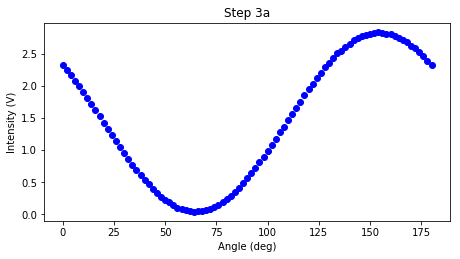

In [26]:
cal_dict["I_step_3a"] = cal.make_step_3a(cal_dict)

#### Step 3b

P3 (motor 0) and P2 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


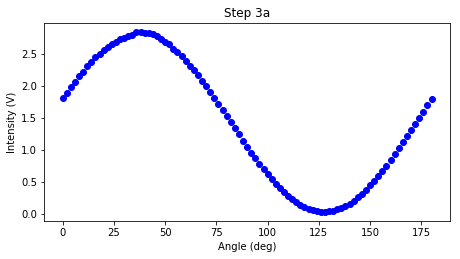

In [27]:
cal_dict["I_step_3b"] = cal.make_step_3b(cal_dict)

#### Step 3c

P1 (motor 0) and P2 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


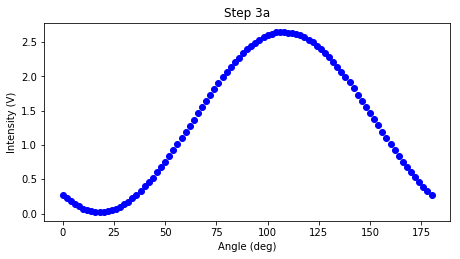

In [28]:
cal_dict["I_step_3c"] = cal.make_step_3c(cal_dict)

### Preliminary analysis of Step 3

Just to check how good are we on the analysis.

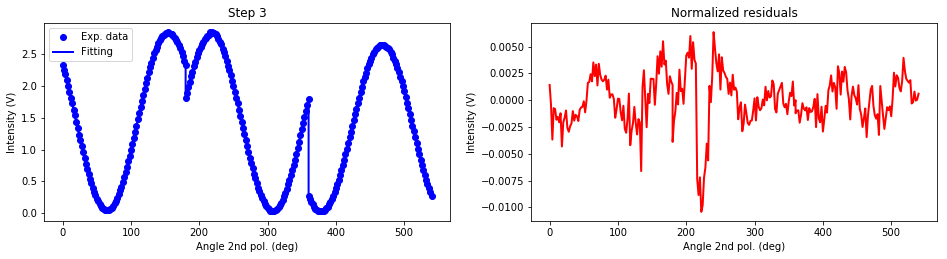

The normalized MSE is: 0.01 %.

Preliminary analysis:
   - P1 p1         : 0.960
   - P1 p2         : 0.082
   - P1 theta_0    : -145.1 deg
   - P2 p1         : 0.956
   - P2 p2         : 0.029
   - P2 theta_0    : -73.8 deg
   - P3 p1         : 0.960
   - P3 p2         : -0.109
   - P3 theta_0    : -35.8 deg


In [29]:
cal_dict["Mp1_test"], cal_dict["p11"], cal_dict["p12"], cal_dict["th0_p1_test"], cal_dict["Mp2_test"], cal_dict["th0_p2_test"] = cal.analysis_step_3(cal_dict)

## Step 4: Characterization of R2

Now, R2 will be characterized. It will be also possible to characterize the retardance of P1.

### Step 4a: Reference angle of R2

Now we place R2 in Motor 2 and calibrate its reference angle.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


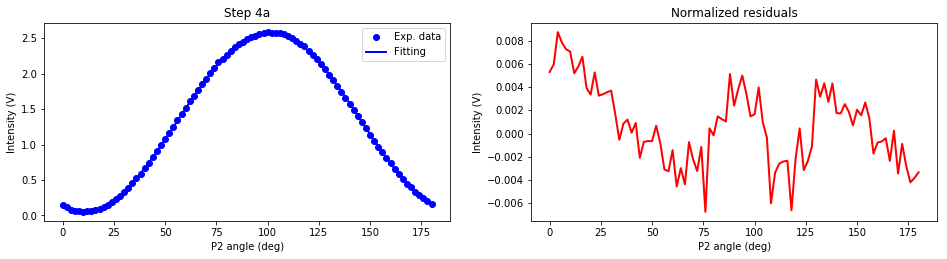

The normalized MSE is: 0.04 %.

Preliminary analysis:
   - R2 angle         : 26.6 deg


In [32]:
cal_dict["I_step_4a"], cal_dict["th0_r2_test"] = cal.make_step_4a(cal_dict)

### Step 4b: Calibration of R2

Now we calibrate R2, along with the retardance of P1.


Completion:   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3   4   4   4   4   4   4   4   4   4   4   5   5   5   5   5   5   5   5   5   6   6   6   6   6   6   6   6   6   6   7   7   7   7   7   7   7   7   7   8   8   8   8   8   8   8   8   8   8   9   9   9   9   9   9   9   9   9   9  10  10  10  10  10  10  10  10  10  11  11  11  11  11  11  11  11  11  11  12  12  12  12  12  12  12  12  12  13  13  13  13  13  13  13  13  13  13  14  14  14  14  14  14  14  14  14  14  15  15  15  15  15  15  15  15  15  16  16  16  16  16  16  16  16  16  16  17  17  17  17  17  17  17  17  17  18  18  18  18  18  18  18  18  18  18  19  19  19  19  19  19  19  19  19  19  20  20  20  20  20  20  20  20  20  21  21  21  21  21  21  21  21  21  21  22  22  22  22  22  22  22  22  22  22  23  23  23  23  23  23  23  23  23  24  24  24  24  24  24  24  24  24  24  25  25  25  25  25  25

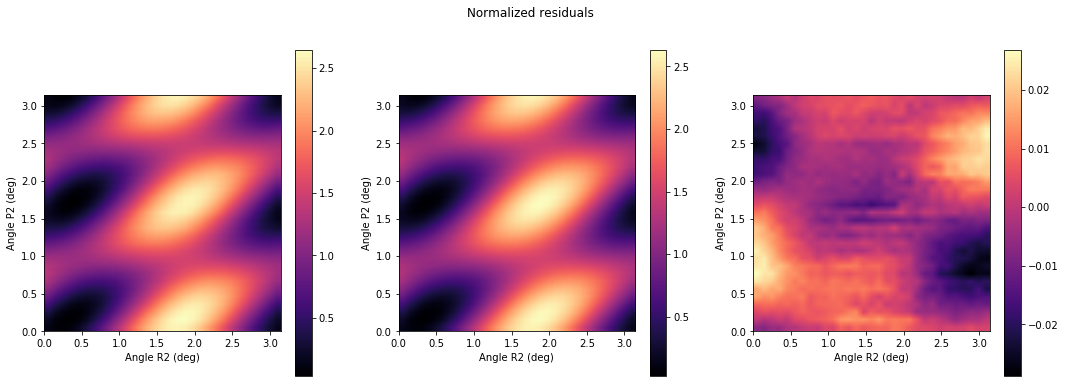

In [33]:
# reload(cal)
# cal_dict["N_measures_2D"] = [15, 15]
# cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][0])
# cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][1])

cal_dict["I_step_4b"], cal_dict["Mp1_test"], cal_dict["Mr2_test"] = cal.make_step_4b(cal_dict)

## Step 5: Characterization of R1

Now, we will characterize R1. First, the reference angle will be determined making a 1D measurement rotating R2 and/or P2. Then, the rest of the parameters will be determined using a 2D experiment. Three different ones will can done, and the result will be averaged using error as weight.

### Step 5a: Reference angle of R1

We start by placing R1 in Motor 1.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %
[ 0.98868929 -0.00547248]


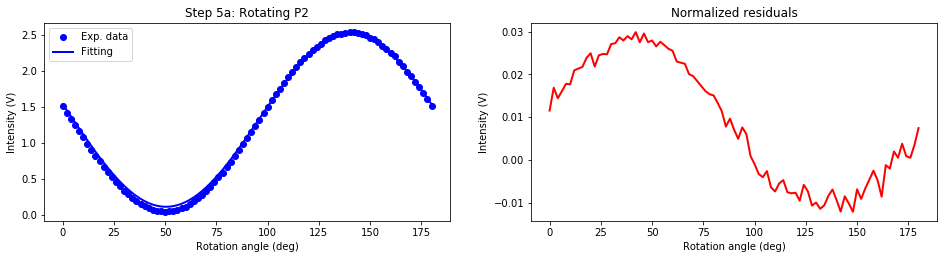

The normalized MSE is: 0.17 %.

Errors:
   - Rotating R1      : 10000.000 %
   - Rotating R2      : 10000.000 %
   - Rotating P2      : 0.172 %
Preliminary analysis:
   - R1 angle         : -0.3 deg


In [86]:
# cal_dict["N_measures_1D"] = 91
# cal_dict["angles_1"] = np.linspace(0,cal_dict["max_angle_1D"],cal_dict["N_measures_1D"])
cal_dict["step_5a"] = "P2"
cal_dict["step_5b"] = "R2+P2"

cal_dict["Ia_step_5a"], cal_dict["Ib_step_5a"], cal_dict["Ic_step_5a"], cal_dict["th0_r1_test"] = cal.make_step_5a(cal_dict)

### Step 5b: Calibration of R1

We can rotate two eleemnts at the same time and we have three that we can rotate (if P1 is rotated, error increases due to the illumination being slightly elliptical). So there are three possible combinations of elements for a 2D measurement. If the three of them are performed, an average can be done, using error as weight.


Completion:   0   0   0   1   1   2   2   3   3   4   4   4   5   5   6   6   7   7   8   8   8   9   9  10  10  11  11  12  12  12  13  13  14  14  15  15  16  16  16  17  17  18  18  19  19  20  20  20  21  21  22  22  23  23  24  24  24  25  25  26  26  27  27  28  28  28  29  29  30  30  31  31  32  32  32  33  33  34  34  35  35  36  36  36  37  37  38  38  39  39  40  40  40  41  41  42  42  43  43  44  44  44  45  45  46  46  47  47  48  48  48  49  49  50  50  51  51  52  52  52  53  53  54  54  55  55  56  56  56  57  57  58  58  59  59  60  60  60  61  61  62  62  63  63  64  64  64  65  65  66  66  67  67  68  68  68  69  69  70  70  71  71  72  72  72  73  73  74  74  75  75  76  76  76  77  77  78  78  79  79  80  80  80  81  81  82  82  83  83  84  84  84  85  85  86  86  87  87  88  88  88  89  89  90  90  91  91  92  92  92  93  93  94  94  95  95  96  96  96  97  97  98  98  99  99 100 %
The normalized MSE is: 0.30 %
Errors:
   - Rotating R1 and R2  : 0.000 %
   - Rot

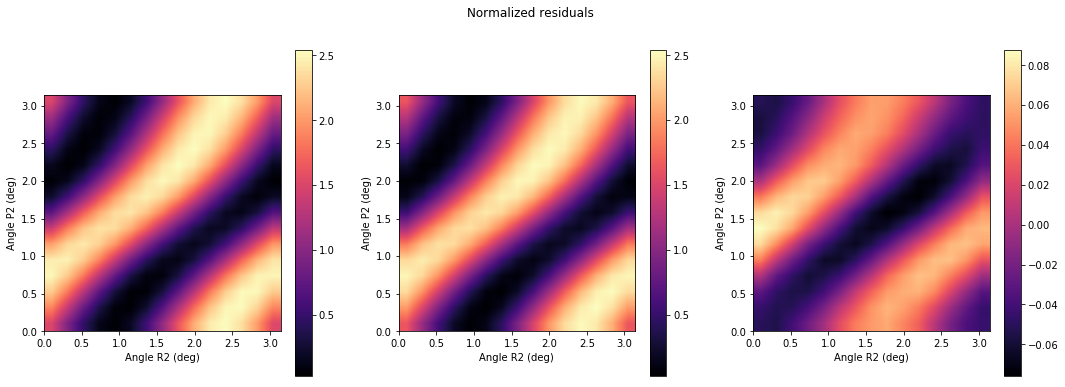

In [87]:
# cal_dict["N_measures_2D"] = [19, 19]
# cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][0])
# cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][1])

cal_dict["Ia_step_5b"], cal_dict["Ib_step_5b"], cal_dict["Ic_step_5b"], cal_dict["Mr1_test"] = cal.make_step_5b(cal_dict)
cal_dict["M_test"] = [cal_dict["Mp1_test"], cal_dict["Mr1_test"], cal_dict["Mr2_test"], cal_dict["Mp2_test"]]

In [84]:
cal_dict['Mr1_test'].diattenuator_retarder_linear(0.998, 0.998, 82.7*degrees, -59.7*degrees)
cal_dict["M_test"] = [cal_dict["Mp1_test"], cal_dict["Mr1_test"], cal_dict["Mr2_test"], cal_dict["Mp2_test"]]

## Step 6: Mueller matrices

Now, we have a working polarimeter. We can start measuring Mueller matrices and use the results to characterize how good is the polarimeter.

### Step 6a: Mueller matrix of air

Air is the reference for all polarimeters, as its Mueller matrix is well known.

motor     = (  0.00,   0.00,   0.00, -179.36)
absolute  = ( -0.00,   0.00,   0.00, 179.36)
polarizer = (  0.00,   0.00,   0.00, 179.36)
  0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  28  29  30  30  31  31  32  32  33  33  34  34  35  35  36  36  37  37  38  38  39  39  40  40  41  41  42  42  43  43  44  44  45  45  46  46  47  47  48  48  49  49  50  50  51  51  52  52  53  53  54  54  55  55  56  56  56  57  57  58  59  59  60  60  61  61  62  62  63  63  64  64  65  65  66  66  67  67  68  68  69  69  70  70  71  71  72  72  73  73  74  74  75  75  76  76  77  77  78  78  79  79  80  80  81  81  82  82  83  83  84  84  85  85  86  86  87  87  88  88  89  89  90  90  91  91  92  92  93  93  94  94  95  95  96  96  97  97  98  98  99  99 100 %
Mean reference intensity changed from 2.06208910421 V to 2.05

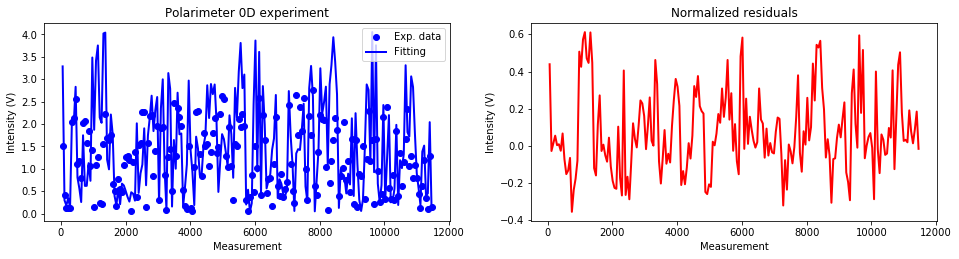

The normalized MSE is: 1.63 %.


Experimento concluido con exito
No old folder to return


In [96]:
cal_dict['angles_step_6a'], cal_dict['I_step_6a'] = cal.make_step_6a(cal_dict)

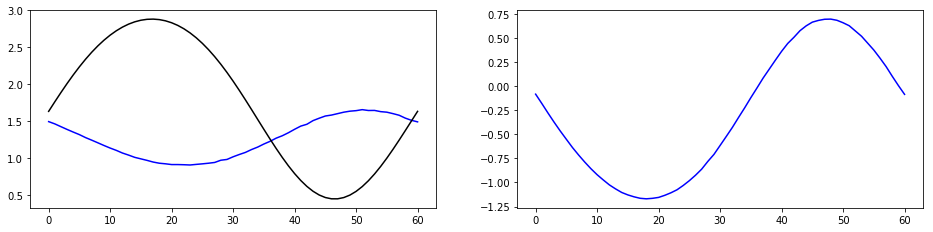

In [93]:
cal.make_check(cal_dict)

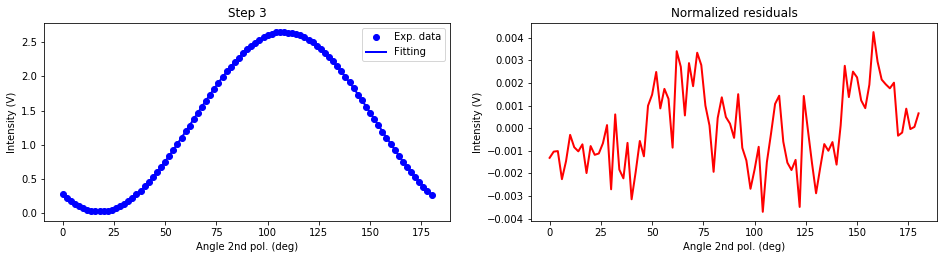

The normalized MSE is: 0.02 %.



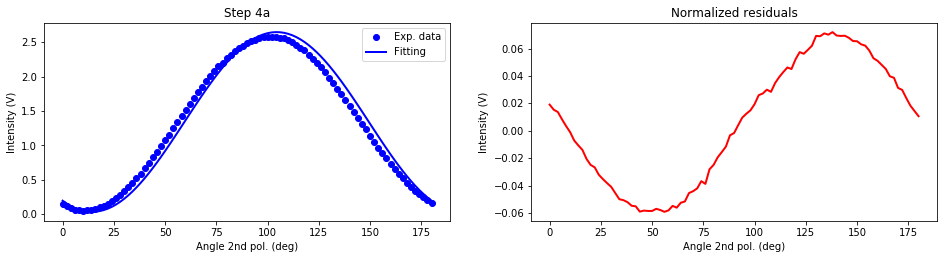

The normalized MSE is: 0.47 %.

The normalized MSE is: 0.14 %


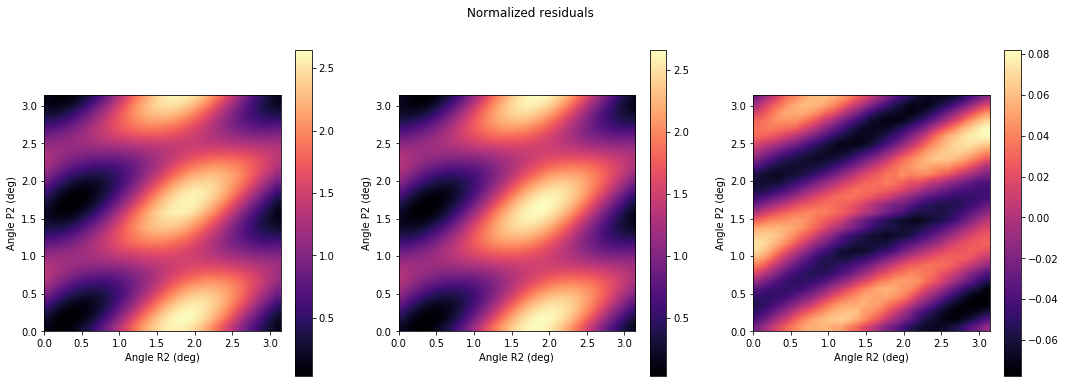

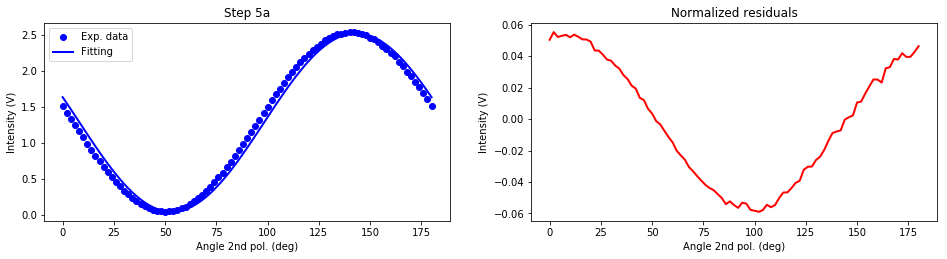

The normalized MSE is: 0.40 %.

The normalized MSE is: 0.30 %


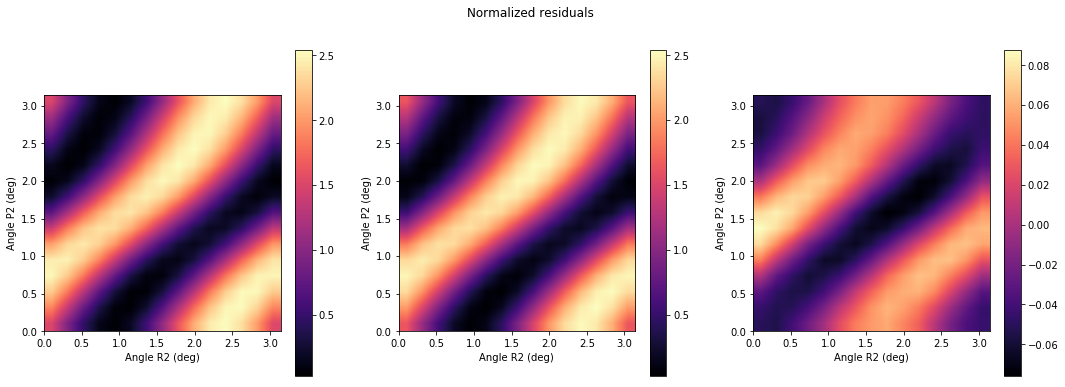

In [94]:
cal.analysis_check(cal_dict)

### Step 6b: Mueller matrix of the polarizer with known angles

In the last step, we will place the polarizer with known angles as sample for the polarimeter and we will measure it. That will give us a measure of the precission of the polarimeter (as we will be able to compare the result of the fit with this new result), and will give us a final method for knowing the origin angles of our optical elements respect to the lab axes.

motor     = ( -0.75,  11.29,  78.88, -150.86)
absolute  = (  0.75,  11.29,  78.88, 150.86)
polarizer = (  0.75,  11.29,  78.88, 150.86)
  0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  28  29  30  30  31  31  32  32  33  33  34  34  35  35  36  36  37  37  38  38  39  39  40  40  41  41  42  42  43  43  44  44  45  45  46  46  47  47  48  48  49  49  50  50  51  51  52  52  53  53  54  54  55  55  56  56  56  57  57  58  59  59  60  60  61  61  62  62  63  63  64  64  65  65  66  66  67  67  68  68  69  69  70  70  71  71  72  72  73  73  74  74  75  75  76  76  77  77  78  78  79  79  80  80  81  81  82  82  83  83  84  84  85  85  86  86  87  87  88  88  89  89  90  90  91  91  92  92  93  93  94  94  95  95  96  96  97  97  98  98  99  99 100 %


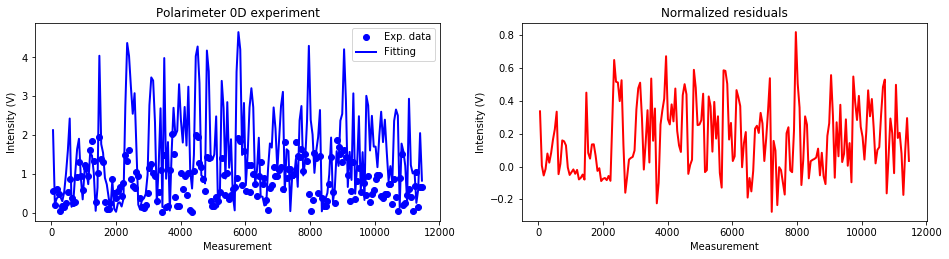

The normalized MSE is: 1.93 %.


Experimento concluido con exito
No old folder to return


KeyError: 'azimuth pol'

In [97]:
cal_dict['angles_step_6b'], cal_dict['I_step_6b'] = cal.make_step_6b(cal_dict)

### Save file with all the data

Now we will save a file with all the data together, just as a safety, as it will be redundant.

In [98]:
cal.save_all_together(cal_dict)

# Stage 2: Data fit

Now we fit all the experiments performed in the previous steps in an iterative procedure, so we can obtain the best possible parameters for the optical elements of the polarimeter. It is worth remembering that we are making an hypothesis: the optical elements are pure homogenous diattenuator retarders. This means that we don't measure their depolarization factor and ellipticity angle of the eigenstates (both are supposed to be 0).

In [99]:
cal.Process_Calibration(cal_dict)

Iteracion 0
Angle error amplitude for current iteration = 90.0


TypeError: error_step_2a() takes exactly 7 arguments (11 given)

## Final

Ahora vamos a copiar el script utilizado para realizar el ajuste, y este notebook. IMPORTANTE: Comprueba los nombres de archivo y localizaciones, no pueden guardarse en variables y hay que cambiarlo manualmente ahora. 

In [100]:
# Recordar fecha para nombre de archivos
fecha = datetime.date.today()
print(fecha)

NameError: name 'datetime' is not defined

In [101]:
# Go to script folder
%cd process
# Copy the file
%copy $name_process $path_medidas_new
# Go to notebook folder
%cd medidas
# Copy the file
%copy $name_notebook $path_medidas_new

(bookmark:process) -> C:\Users\luismiguel\software\polaripython\polarimeter
[Error 2] El sistema no puede encontrar el archivo especificado: u'C:\\Users\\luismiguel\\software\\polaripython\\polarimeter'
C:\Users\luismiguel\software\polaripython\calibration
El sistema no puede encontrar el archivo especificado.
(bookmark:medidas) -> C:\Users\luismiguel\software\polaripython\medidas_0D
C:\Users\luismiguel\software\polaripython\medidas_0D
El sistema no puede encontrar el archivo especificado.


Finalmente, cerrar los motores.

In [102]:
# Cerrar motores
motors.close()
del motors
LabJackPython.Close()

NameError: name 'motors' is not defined